In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

Leemos el dataset de los resultados

In [39]:
bt_resultados = pd.read_csv("resultados/resultado.csv");
bt_resultados.head()

,dataset,n,#locales,M,metodo,tiempo
0,programacion-dinamica-contra-backtracking,1,45,500,DP,0.550703
1,programacion-dinamica-contra-backtracking,2,45,750,DP,0.781794
2,programacion-dinamica-contra-backtracking,3,45,1000,DP,1.264890
3,programacion-dinamica-contra-backtracking,4,45,1250,DP,1.228970
4,programacion-dinamica-contra-backtracking,5,45,1500,DP,1.433370


Experimentacion para factibilidad:

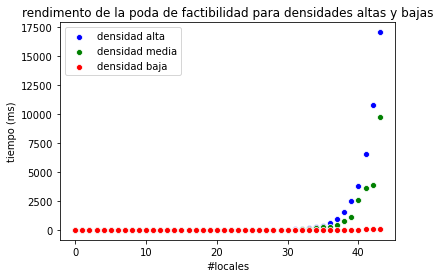

In [22]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
bt_complejidad_BT_densidad_alta = bt_resultados[(bt_resultados["metodo"]=="BT-F") & 
                                                (bt_resultados["dataset"]=="densidad-alta-factibilidad")].copy();
# densidad media
bt_complejidad_BT_densidad_media = bt_resultados[(bt_resultados["metodo"]=="BT-F") & 
                                                 (bt_resultados["dataset"]=="densidad-media-factibilidad")].copy();
# densidad media
bt_complejidad_BT_densidad_baja = bt_resultados[(bt_resultados["metodo"]=="BT-F") & 
                                                 (bt_resultados["dataset"]=="densidad-baja-factibilidad")].copy();
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_alta, x='#locales', y='tiempo', color="b", label="densidad alta");
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_media, x='#locales', y='tiempo', color="g", label="densidad media");
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_baja, x='#locales', y='tiempo', color="r", label="densidad baja");
fig.set_title('rendimento de la poda de factibilidad para densidades altas y bajas')
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-densidades");

### BT CON MEJORES Y PEORES CASOS DE FACTIBILIDAD

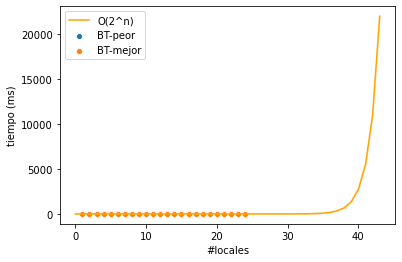

In [23]:
# Comparamos el dataset densidad-alta contra una función exponencial.
bt_complejidad_BT_f_peor = bt_resultados[(bt_resultados["metodo"]=="BT") & (bt_resultados["dataset"]=="peor-caso-bt-f")].copy();
bt_complejidad_BT_f_mejor = bt_resultados[(bt_resultados["metodo"]=="BT") & (bt_resultados["dataset"]=="mejor-caso-bt-f")].copy();
bt_complejidad_BT = bt_resultados[(bt_resultados["metodo"]=="BT")].copy();
bt_complejidad_BT["tiempo_esperado"] = 2.0 ** bt_complejidad_BT["n"] * 0.0000000025; # Exponencial
#bt_complejidad_BT_A = bt_resultados[(bt_resultados["metodo"]=="BT-A") & (bt_resultados["dataset"]=="densidad-media-optimalidad")].copy();

fig = sns.scatterplot(data=bt_complejidad_BT_f_peor, x='#locales', y='tiempo',);
fig = sns.scatterplot(data=bt_complejidad_BT_f_mejor, x='#locales', y='tiempo');
#fig = sns.scatterplot(data=bt_complejidad_BT_A, x='#locales', y='tiempo', color="magenta");
fig = sns.lineplot(data=bt_complejidad_BT, x='#locales', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','BT-peor', 'BT-mejor']);
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-normal-mejor-peor-factibilidad")

### BT CON MEJORES Y PEORES CASOS DE OPTIMALIDAD

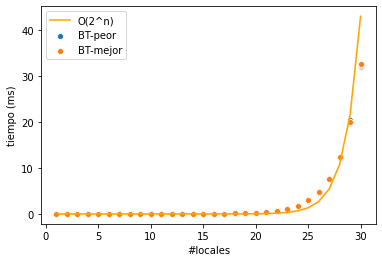

In [24]:
# Comparamos el dataset densidad-alta contra una función exponencial.
bt_complejidad_BT_f_peor = bt_resultados[(bt_resultados["metodo"]=="BT") & (bt_resultados["dataset"]=="peor-caso-bt-f")].copy();
bt_complejidad_BT_f_mejor = bt_resultados[(bt_resultados["metodo"]=="BT") & (bt_resultados["dataset"]=="mejor-caso-bt-f")].copy();
bt_complejidad_BT_o_peor = bt_resultados[(bt_resultados["metodo"]=="BT") & (bt_resultados["dataset"]=="peor-caso-bt-o")].copy();
bt_complejidad_BT_o_mejor = bt_resultados[(bt_resultados["metodo"]=="BT") & (bt_resultados["dataset"]=="mejor-caso-bt-o")].copy();
bt_complejidad_BT = bt_resultados[(bt_resultados["metodo"]=="BT") & (bt_resultados["dataset"]=="peor-caso-bt-o")].copy();
bt_complejidad_BT["tiempo_esperado"] = 2.0 ** bt_complejidad_BT["n"] * 0.000000040; # Exponencial
#bt_complejidad_BT_A = bt_resultados[(bt_resultados["metodo"]=="BT-A") & (bt_resultados["dataset"]=="densidad-media-optimalidad")].copy();

#fig = sns.scatterplot(data=bt_complejidad_BT_f_peor, x='#locales', y='tiempo',);
#fig = sns.scatterplot(data=bt_complejidad_BT_f_mejor, x='#locales', y='tiempo');
fig = sns.scatterplot(data=bt_complejidad_BT_o_peor, x='#locales', y='tiempo');
fig = sns.scatterplot(data=bt_complejidad_BT_o_mejor, x='#locales', y='tiempo');
#fig = sns.scatterplot(data=bt_complejidad_BT_A, x='#locales', y='tiempo', color="magenta");
fig = sns.lineplot(data=bt_complejidad_BT, x='#locales', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','BT-peor', 'BT-mejor']);
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-normal-mejor-peor-optimalidad")

Índice de correlación de Pearson: 0.9836395591867992


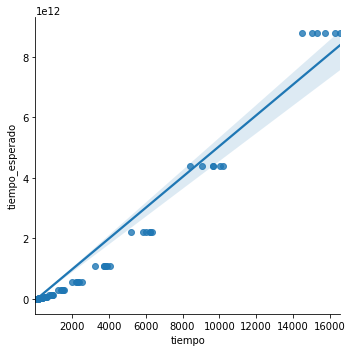

In [25]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
bt_complejidad_BT = bt_resultados[(bt_resultados["metodo"]=="BT") ].copy();
bt_complejidad_BT["tiempo_esperado"] = 2.0 ** bt_complejidad_BT["n"];
fig = sns.lmplot(data=bt_complejidad_BT, x="tiempo", y="tiempo_esperado");
plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(bt_complejidad_BT, "tiempo", "tiempo_esperado"));
plt.savefig("graficos/bt-pearson");

Optimalidad:

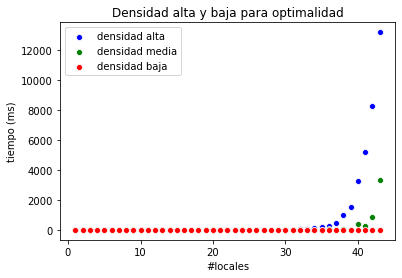

In [26]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
bt_complejidad_BT_densidad_alta = bt_resultados[(bt_resultados["metodo"]=="BT-O") & 
                                                (bt_resultados["dataset"]=="densidad-alta-optimalidad")].copy();
# densidad media
bt_complejidad_BT_densidad_media = bt_resultados[(bt_resultados["metodo"]=="BT-O") & 
                                                 (bt_resultados["dataset"]=="densidad-media-optimalidad")].copy();
# densidad media
bt_complejidad_BT_densidad_baja = bt_resultados[(bt_resultados["metodo"]=="BT-O") & 
                                                 (bt_resultados["dataset"]=="densidad-baja-optimalidad")].copy();
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_alta, x='#locales', y='tiempo', color="b", label="densidad alta");
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_media, x='#locales', y='tiempo', color="g", label="densidad media");
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_baja, x='#locales', y='tiempo', color="r", label="densidad baja");

fig.set_title('Densidad alta y baja para optimalidad')
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-densidades-optimalidad");

### mejor y peor caso de optimalidad:

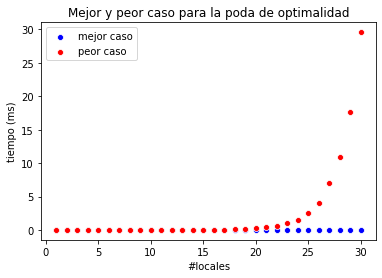

In [27]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
bt_complejidad_BT_O_Mejor_caso = bt_resultados[(bt_resultados["metodo"]=="BT-O") & 
                                                (bt_resultados["dataset"]=="mejor-caso-bt-o")].copy();
# densidad media
bt_complejidad_BT_O_Peor_caso = bt_resultados[(bt_resultados["metodo"]=="BT-O") & 
                                                 (bt_resultados["dataset"]=="peor-caso-bt-o")].copy();
#print(bt_complejidad_BT_O_Mejor_caso)
#print(bt_complejidad_BT_O_Peor_caso)
fig = sns.scatterplot(data=bt_complejidad_BT_O_Mejor_caso, x='#locales', y='tiempo', color="b", label="mejor caso");
fig = sns.scatterplot(data=bt_complejidad_BT_O_Peor_caso, x='#locales', y='tiempo', color="r", label="peor caso");

fig.set_title('Mejor y peor caso para la poda de optimalidad')
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-peor-y-mejor-caso-optimalidad");

### Linealidad del mejor caso optimalidad:

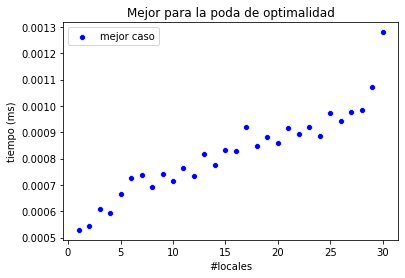

In [28]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
bt_complejidad_BT_O_Mejor_caso = bt_resultados[(bt_resultados["metodo"]=="BT-O") & 
                                                (bt_resultados["dataset"]=="mejor-caso-bt-o")].copy();
# densidad media
bt_complejidad_BT_O_Peor_caso = bt_resultados[(bt_resultados["metodo"]=="BT-O") & 
                                                 (bt_resultados["dataset"]=="peor-caso-bt-o")].copy();
#print(bt_complejidad_BT_O_Mejor_caso)
#print(bt_complejidad_BT_O_Peor_caso)
fig = sns.scatterplot(data=bt_complejidad_BT_O_Mejor_caso, x='#locales', y='tiempo', color="b", label="mejor caso");
#fig = sns.scatterplot(data=bt_complejidad_BT_O_Peor_caso, x='#locales', y='tiempo', color="r", label="peor caso");

fig.set_title('Mejor para la poda de optimalidad')
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-mejor-caso-optimalidad");

### mejor y peor caso Factibilidad

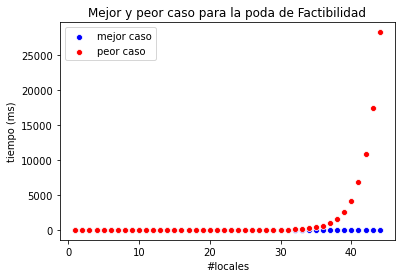

In [29]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
bt_complejidad_BT_F_Mejor_caso = bt_resultados[(bt_resultados["metodo"]=="BT-F") & 
                                                (bt_resultados["dataset"]=="mejor-caso-bt-f")].copy();
# densidad media
bt_complejidad_BT_F_Peor_caso = bt_resultados[(bt_resultados["metodo"]=="BT-F") & 
                                                 (bt_resultados["dataset"]=="peor-caso-bt-f")].copy();
#print(bt_complejidad_BT_O_Mejor_caso)
#print(bt_complejidad_BT_O_Peor_caso)
fig = sns.scatterplot(data=bt_complejidad_BT_F_Mejor_caso, x='#locales', y='tiempo', color="b", label="mejor caso");
fig = sns.scatterplot(data=bt_complejidad_BT_F_Peor_caso, x='#locales', y='tiempo', color="r", label="peor caso");

fig.set_title('Mejor y peor caso para la poda de Factibilidad')
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-peor-y-mejor-caso-factibilidad");

### ver la linealidad de factibilidad:

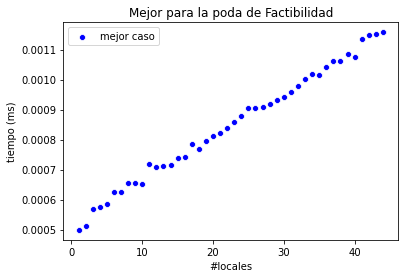

In [30]:
# Graficamos los tie& (bt_resultados["dataset"]=="densidad-media-optimalidad")mpos de ejecución de cada dataset en función de n.
bt_complejidad_BT_F_Mejor_caso = bt_resultados[(bt_resultados["metodo"]=="BT-F") & 
                                                (bt_resultados["dataset"]=="mejor-caso-bt-f")].copy();
# densidad media
bt_complejidad_BT_F_Peor_caso = bt_resultados[(bt_resultados["metodo"]=="BT-F") & 
                                                 (bt_resultados["dataset"]=="peor-caso-bt-f")].copy();
#print(bt_complejidad_BT_O_Mejor_caso)
#print(bt_complejidad_BT_O_Peor_caso)
fig = sns.scatterplot(data=bt_complejidad_BT_F_Mejor_caso, x='#locales', y='tiempo', color="b", label="mejor caso");
#fig = sns.scatterplot(data=bt_complejidad_BT_F_Peor_caso, x='#locales', y='tiempo', color="r", label="peor caso");

fig.set_title('Mejor para la poda de Factibilidad')
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-mejor-caso-factibilidad");

## Fuerza bruta

### rendimento de FB con las instancias de densidades altas y bajas de fatibilidad

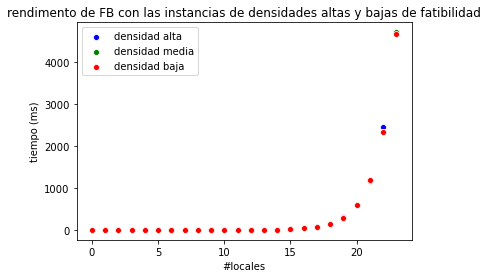

In [33]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
bt_complejidad_BT_densidad_alta = bt_resultados[(bt_resultados["metodo"]=="FB") & 
                                                (bt_resultados["dataset"]=="densidad-alta-factibilidad")].copy();
# densidad media
bt_complejidad_BT_densidad_media = bt_resultados[(bt_resultados["metodo"]=="FB") & 
                                                 (bt_resultados["dataset"]=="densidad-media-factibilidad")].copy();
# densidad media
bt_complejidad_BT_densidad_baja = bt_resultados[(bt_resultados["metodo"]=="FB") & 
                                                 (bt_resultados["dataset"]=="densidad-baja-factibilidad")].copy();
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_alta, x='#locales', y='tiempo', color="b", label="densidad alta");
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_media, x='#locales', y='tiempo', color="g", label="densidad media");
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_baja, x='#locales', y='tiempo', color="r", label="densidad baja");
fig.set_title('rendimento de FB con las instancias de densidades altas y bajas de fatibilidad')
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-densidades-factibilidad");

### rendimento de FB con las instancias de densidades altas y bajas de optimalidad

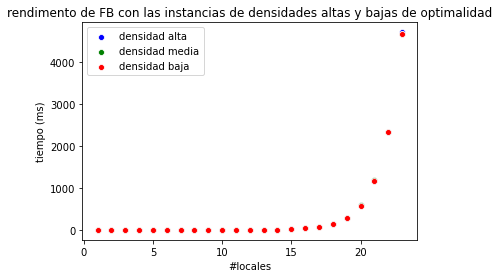

In [34]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
bt_complejidad_BT_densidad_alta = bt_resultados[(bt_resultados["metodo"]=="FB") & 
                                                (bt_resultados["dataset"]=="densidad-alta-optimalidad")].copy();
# densidad media
bt_complejidad_BT_densidad_media = bt_resultados[(bt_resultados["metodo"]=="FB") & 
                                                 (bt_resultados["dataset"]=="densidad-media-optimalidad")].copy();
# densidad media
bt_complejidad_BT_densidad_baja = bt_resultados[(bt_resultados["metodo"]=="FB") & 
                                                 (bt_resultados["dataset"]=="densidad-baja-optimalidad")].copy();
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_alta, x='#locales', y='tiempo', color="b", label="densidad alta");
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_media, x='#locales', y='tiempo', color="g", label="densidad media");
fig = sns.scatterplot(data=bt_complejidad_BT_densidad_baja, x='#locales', y='tiempo', color="r", label="densidad baja");

fig.set_title('rendimento de FB con las instancias de densidades altas y bajas de optimalidad')
fig.set(xlabel='#locales', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-densidades-optimalidad");

### perason de fuerza bruta

Índice de correlación de Pearson para FB: 0.9999474998429712


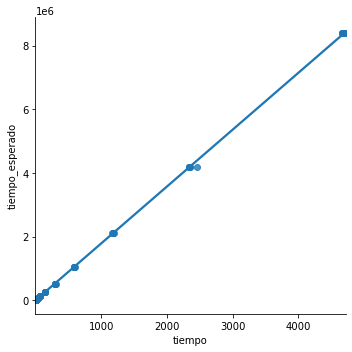

In [35]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
complejidad_FB = bt_resultados[(bt_resultados["metodo"]=="FB")].copy();
complejidad_FB["tiempo_esperado"] = 2.0 ** complejidad_FB["n"];
fig = sns.lmplot(data=complejidad_FB, x="tiempo", y="tiempo_esperado");
#fig.set_title('Pearson para FB')
plt.savefig("graficos/DP-correlacion.svg");
print("Índice de correlación de Pearson para FB:", correlacion_pearson(complejidad_FB, "tiempo", "tiempo_esperado"));
plt.savefig("graficos/FB-pearson");

# Programacion dinamica

### dinamica vs BT-A

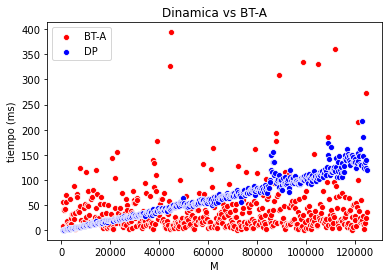

In [40]:
# Graficamos los tie& (bt_resultados["dataset"]=="densidad-media-optimalidad")mpos de ejecución de cada dataset en función de n.
complejidad_DP = bt_resultados[(bt_resultados["metodo"]=="DP") & (bt_resultados["dataset"]=="programacion-dinamica-contra-backtracking")].copy();
# densidad media
complejidad_BT_A = bt_resultados[(bt_resultados["metodo"]=="BT-A") & 
                                                 (bt_resultados["dataset"]=="programacion-dinamica-contra-backtracking")].copy();
#print(complejidad_DP)
#print(bt_complejidad_BT_O_Peor_caso)
fig = sns.scatterplot(data=complejidad_BT_A, x='M', y='tiempo', color="r", label="BT-A");
fig = sns.scatterplot(data=complejidad_DP, x='M', y='tiempo', color="b", label="DP");

fig.set_title('Dinamica vs BT-A')
fig.set(xlabel='M', ylabel='tiempo (ms)');
plt.savefig("graficos/dinamica-vs-bt-a");

### HEATMAP

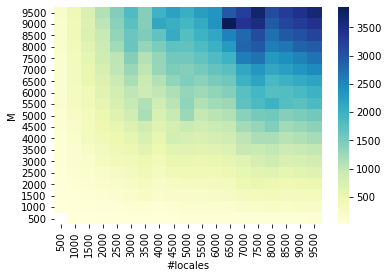

In [42]:
# Graficamos los tie& (bt_resultados["dataset"]=="densidad-media-optimalidad")mpos de ejecución de cada dataset en función de n.
complejidad_DP = bt_resultados[(bt_resultados["metodo"]=="DP") & (bt_resultados["dataset"]=="programacion-dinamica")].copy();

heatmap1_data = pd.pivot_table(complejidad_DP, values='tiempo', index=['M'], columns='#locales')
heatmap1_data.sort_index(axis=0, ascending=False, inplace=True)
foto = sns.heatmap(heatmap1_data, cmap="YlGnBu")

foto = foto.get_figure()
foto.savefig("graficos/dinamica")

### Pearson dinamica

Índice de correlación de Pearson: 0.9694878915484758


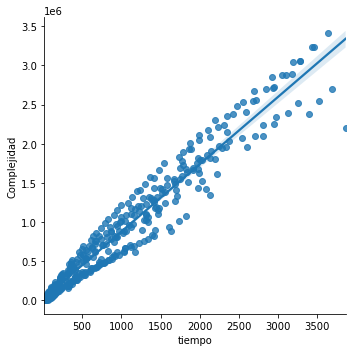

In [43]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
complejidad_PD = bt_resultados[(bt_resultados["metodo"]=="DP") & (bt_resultados["dataset"]=="programacion-dinamica")].copy();
complejidad_PD["Complejidad"] =  complejidad_PD["M"] * complejidad_PD["n"];
fig = sns.lmplot(data=complejidad_PD, x="tiempo", y="Complejidad");
plt.savefig("graficos/DP-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(complejidad_PD, "tiempo", "Complejidad"));
plt.savefig("graficos/DP-pearson");